<a href="https://colab.research.google.com/github/mobley-trent/INTERNSAVY/blob/main/cricket_wc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

This notebook contains an analysis on the data from the Cricket World Cup 2019. We delve into the data to uncover insights on:
- The effect of venues on team performance.
- Finding the best individual players for each major category of stats.

# DATA

We make use of the Kaggle API to pull in the data into Google Colab.

(There is an option to use the data locally if you clone the repo):

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d saivamshi/cricket-world-cup-2019-players-data

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/395k [00:00<?, ?B/s]
100% 395k/395k [00:00<00:00, 109MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("husl")
sns.set(rc={'axes.facecolor':'#F1F2F2', 'figure.facecolor':'#F2F2F2'})

In [ ]:
!unzip /content/cricket-world-cup-2019-players-data.zip

Archive:  /content/cricket-world-cup-2019-players-data.zip
replace Batsman_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Batsman_Data.csv        
replace Bowler_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Bowler_data.csv         
  inflating: Ground_Averages.csv     
  inflating: ODI_Match_Results.csv   
  inflating: ODI_Match_Totals.csv    
  inflating: WC_players.csv          


In [ ]:
batsman = pd.read_csv('/content/Batsman_Data.csv')
ground = pd.read_csv('/content/Ground_Averages.csv')
odi_scores = pd.read_csv('/content/ODI_Match_Totals.csv')
odi_results = pd.read_csv('/content/ODI_Match_Results.csv')
wc_players = pd.read_csv('/content/WC_players.csv')
bowler = pd.read_csv('/content/Bowler_data.csv')

In [ ]:
# Import data locally

# batsman = pd.read_csv('data/Batsman_Data.csv')
# ground = pd.read_csv('data/Ground_Averages.csv')
# odi_scores = pd.read_csv('data/ODI_Match_Totals.csv')
# odi_results = pd.read_csv('data/ODI_Match_Results.csv')
# wc_players = pd.read_csv('data/WC_players.csv')
# bowler = pd.read_csv('data/Bowler_data.csv')

In [ ]:
datasets = {
    "Batsman":batsman.copy(),
    "Ground Avgs":ground.copy(),
    "ODI Match Totals":odi_scores.copy(),
    "ODI Match Results":odi_results.copy(),
    "WC Players":wc_players.copy(),
    "Bowler":bowler.copy()
}

for title, df in datasets.items():
    print('\n\n\n')
    print(title)
    print(df.shape, end='\n\n')
    display(df.sample(6))





Batsman
(11149, 13)



,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
9814,9815,0,0,7,0.00,0,0,v New Zealand,Melbourne,9 Dec 2016,ODI # 3813,Steve Smith,267192
6871,6872,92,92,107,85.98,8,0,v Australia,Kolkata,21 Sep 2017,ODI # 3912,Virat Kohli,253802
8645,8646,56*,56,107,52.33,3,2,v India,Port of Spain,17 Mar 2007,ODI # 2538,Mushfiqur Rahim,56029
527,528,61,61,74,82.43,5,3,v Pakistan,Sharjah,2 Oct 2016,ODI # 3788,Darren Bravo,277472
10670,10671,58,58,59,98.30,3,2,v Canada,King City (NW),7 Aug 2011,ODI # 3173,Mohammad Nabi,25913
198,199,8*,8,11,72.72,1,0,v Sri Lanka,Port of Spain,7 Jul 2013,ODI # 3385,Kemar Roach,230553






Ground Avgs
(106, 11)



,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
96,Perth Stadium - Australia,2018-2018,2,2,0,0,811,34,981,23.85,4.96
104,"Wanderers Cricket Ground, Windhoek - Namibia",2019-2019,1,1,0,0,307,17,474,18.05,3.88
43,"Providence Stadium, Guyana - West Indies",2013-2018,10,10,0,0,4317,154,5477,28.03,4.72
22,"Mangaung Oval, Bloemfontein - South Africa",2013-2018,3,3,0,0,1430,48,1448,29.79,5.92
71,"Bayuemas Oval, Kuala Lumpur - Malaysia",2014-2014,1,1,0,0,434,14,556,31.00,4.68
91,"Greater Noida Sports Complex Ground, Greater N...",2017-2017,5,5,0,0,2629,79,2918,33.27,5.40






ODI Match Totals
(1296, 13)



,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
1154,266,150/9,21.0,7.14,NaN,1,lost,v England,Pallekele,17 Oct 2018,ODI # 4054,SriLanka,8
247,716,314/9,50.0,6.28,315.0,2,tied,v New Zealand,Auckland,25 Jan 2014,ODI # 3462,India,6
755,497,284/9,49.0,5.79,NaN,1,won,v West Indies,Sharjah,30 Sep 2016,ODI # 3784,Pakistan,7
208,302,181/6,38.4,4.68,180.0,2,won,v Pakistan,Centurion,30 Nov 2013,ODI # 3441,SouthAfrica,3
1175,533,219,47.2,4.62,267.0,2,lost,v New Zealand,Abu Dhabi,7 Nov 2018,ODI # 4066,Pakistan,7
548,474,375/3,50.0,7.50,NaN,1,won,v Zimbabwe,Lahore,26 May 2015,ODI # 3651,Pakistan,7






ODI Match Results
(1322, 12)



,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
317,166,lost,75 runs,NaN,lost,2nd,v South Africa,Colombo (RPS),6 Jul 2014,ODI # 3500,SriLanka,8
473,190,won,34 runs,NaN,won,1st,v New Zealand,Wellington,29 Jan 2015,ODI # 3594,SriLanka,8
1228,409,won,5 wickets,48.0,won,2nd,v Pakistan,Durban,22 Jan 2019,ODI # 4081,SouthAfrica,3
83,9,won,2 wickets,56.0,won,2nd,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,WestIndies,4
461,188,lost,108 runs,NaN,won,2nd,v New Zealand,Dunedin,23 Jan 2015,ODI # 3588,SriLanka,8
1294,1229,won,6 runs,NaN,lost,1st,v Pakistan,Dubai (DSC),29 Mar 2019,ODI # 4119,Australia,2






WC Players
(152, 3)



,Player,ID,Country
26,Steve Smith,267192,Australia
137,Jason Holder (c),391485,WestIndies
34,Liton Das,536936,Bangladesh
3,Asghar Afghan,320652,Afghanistan
111,David Miller,321777,SouthAfrica
16,Pat Cummins (vc),489889,Australia






Bowler
(11118, 14)



,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
1657,1658,-,-,-,-,-,-,-,v India,Port of Spain,11 Jul 2013,ODI # 3388,Lahiru Thirimanne,301236
11010,11011,10.0,0,37,2,3.70,18.50,30.0,v Zimbabwe,Bulawayo,22 Oct 2015,ODI # 3697,Rashid Khan,793463
3573,3574,8.0,0,44,0,5.50,-,-,v South Africa,Port Elizabeth,27 Nov 2013,ODI # 3440,Mohammad Hafeez,41434
10477,10478,-,-,-,-,-,-,-,v Ireland,Dubai (DSC),17 Jan 2015,ODI # 3581,Najibullah Zadran,524049
8140,8141,6.0,0,27,0,4.50,-,-,v Zimbabwe,Dhaka,7 Nov 2015,ODI # 3703,Mustafizur Rahman,330902
1469,1470,-,-,-,-,-,-,-,v Australia,The Oval,17 Jun 2013,ODI # 3374,Kusal Perera,300631


In [ ]:
for i in ["ODI Match Results", "ODI Match Totals"]:
    datasets[i].rename(columns={'Unnamed: 0': 'Scores_ID'}, inplace=True)

In [ ]:
# Focusing on English pitches and gameplay

WC_venue_pitches = ["The Oval, London",
                    "Trent Bridge, Nottingham",
                    "Sophia Gardens, Cardiff",
                    "County Ground, Bristol",
                    "Rose Bowl, Southampton",
                    "County Ground, Taunton",
                    "Old Trafford, Manchester",
                    "Edgbaston, Birmingham",
                    "Headingley, Leeds",
                    "Lord's, London",
                    "Riverside Ground, Chester-le-Street"]

In [ ]:
WC_ground_stats = []
ODI_grounds = datasets["ODI Match Totals"].Ground

for i in ODI_grounds:
    for j in WC_venue_pitches:
        if i in j:
            # print(f"i: {i} --j:{j}")
            WC_ground_stats.append((i,j))

In [ ]:
ground_names = dict(set(WC_ground_stats))

# print(ground_names)

def full_ground_names(val):
    return ground_names[val]

In [ ]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = datasets["ODI Match Totals"][datasets["ODI Match Totals"].Ground.isin([Ground[0] for Ground in WC_ground_stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(full_ground_names)
WC_Grounds_History.head()

,Scores_ID,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5


### > Analysing teams that have played in these venues in the past

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'SriLanka'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

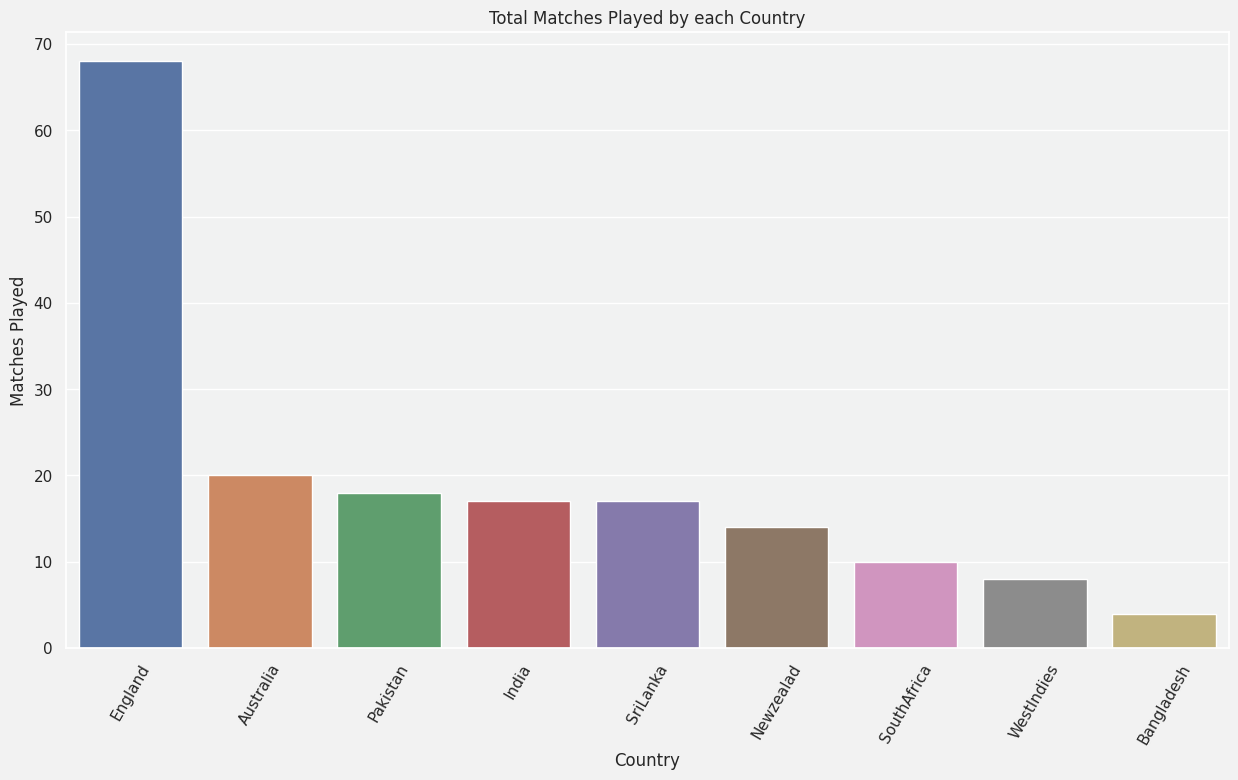

In [ ]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

### > Team Wise Winning Pct in England Pitches

In [ ]:
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [ ]:
# Removing null data i.e Result = "-"

WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(["-"])]
WC_Grounds_History.Result.value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [ ]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["Count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


We display the barplot for the win percentage for each team, ordered in descending order.

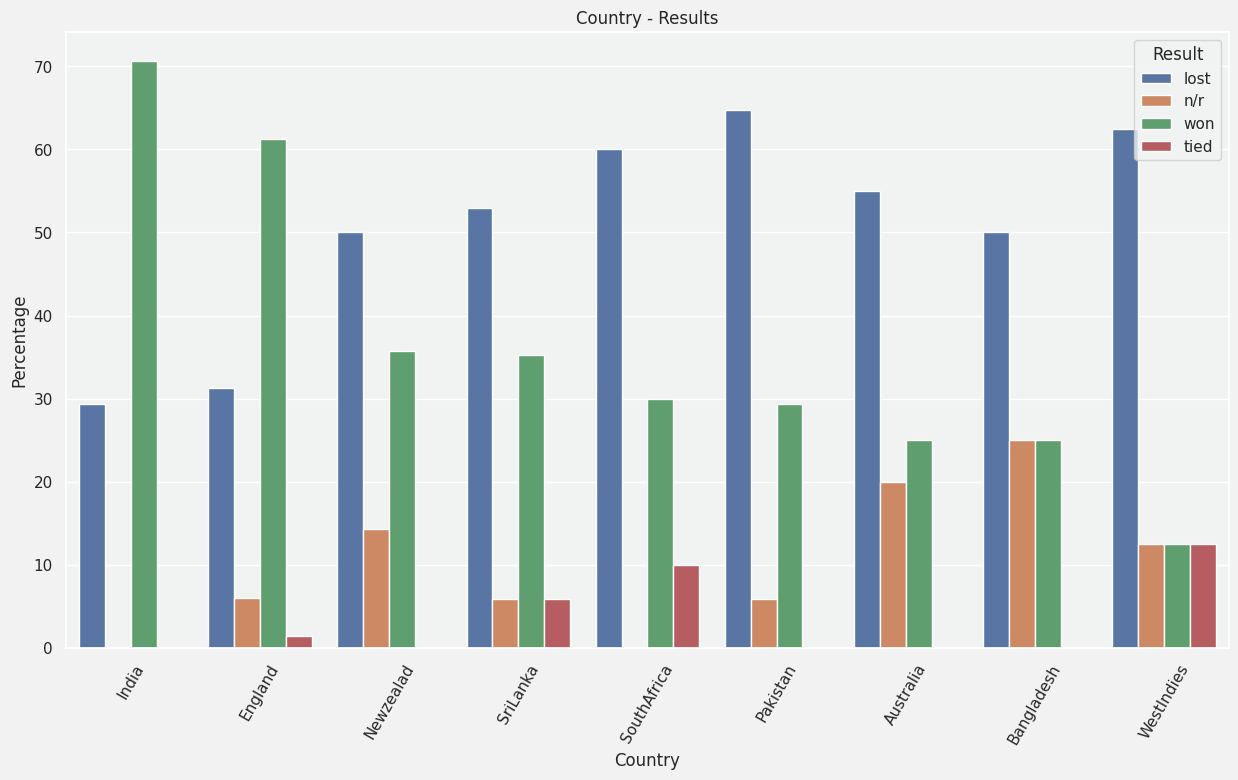

In [ ]:
order = Ground_Results_Per_Team.pivot(index="Country", columns="Result", values="Count")
order = order.sort_values(by="won", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="Country", y="Count", hue="Result", data=Ground_Results_Per_Team, order=order.index)

plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)
plt.show()

We do the same to see the worst performing teams.

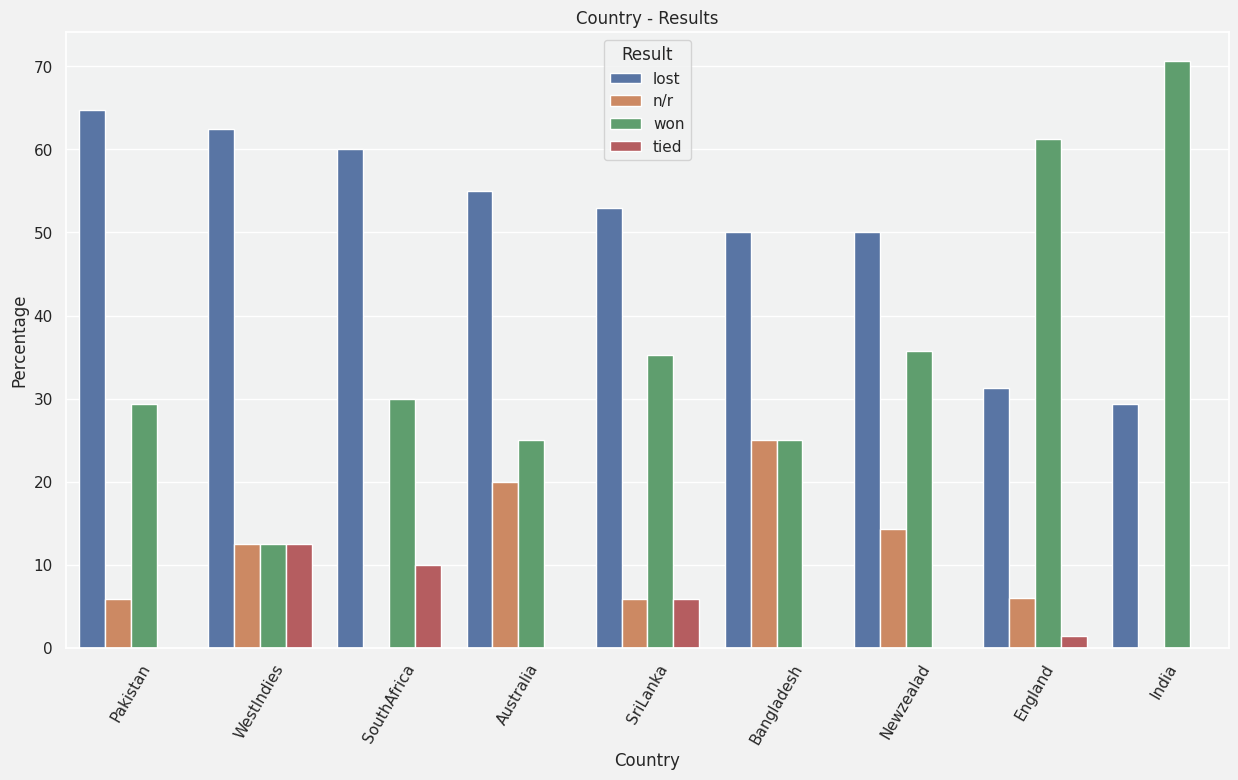

In [ ]:
order = Ground_Results_Per_Team.pivot(index="Country", columns="Result", values="Count")
order = order.sort_values(by="lost", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="Country", y="Count", hue="Result", data=Ground_Results_Per_Team, order=order.index)

plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)
plt.show()

### > Analyzing Win and Loss Pct based on Innings w.r.t Stadium

In [ ]:
WC_Grounds_History.sample(5)

,Scores_ID,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
1279,976,DNB,0.0,-,NaN,0,n/r,v Pakistan,"The Oval, London",8 May 2019,ODI # 4130,England,1
294,866,247/6,39.0,6.33,NaN,1,won,v Sri Lanka,"The Oval, London",22 May 2014,ODI # 3492,England,1
159,1092,227,48.2,4.69,NaN,1,lost,v England,"Sophia Gardens, Cardiff",14 Sep 2013,ODI # 3415,Australia,2
346,873,206,49.3,4.16,NaN,1,lost,v India,"Edgbaston, Birmingham",2 Sep 2014,ODI # 3523,England,1
964,83,245,39.1,6.25,370.0,2,lost,v England,"County Ground, Bristol",24 Sep 2017,ODI # 3915,WestIndies,4


Text(0, 0.5, 'Winning Percentage')

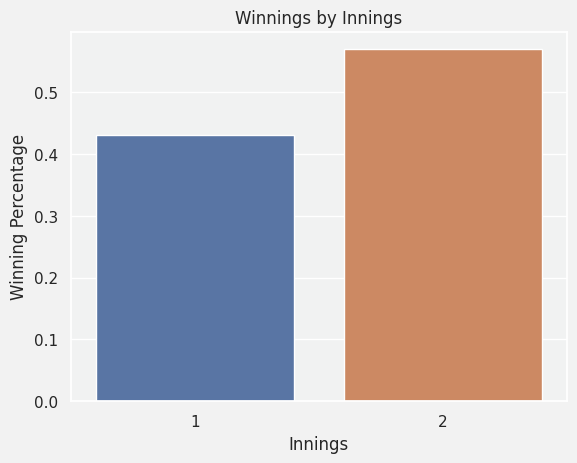

In [ ]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innings")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

From this figure, we understand that:
- Teams which bowl first won around 55% of the matches.

We proceed to divide them by Pitches and see the history.

In [ ]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

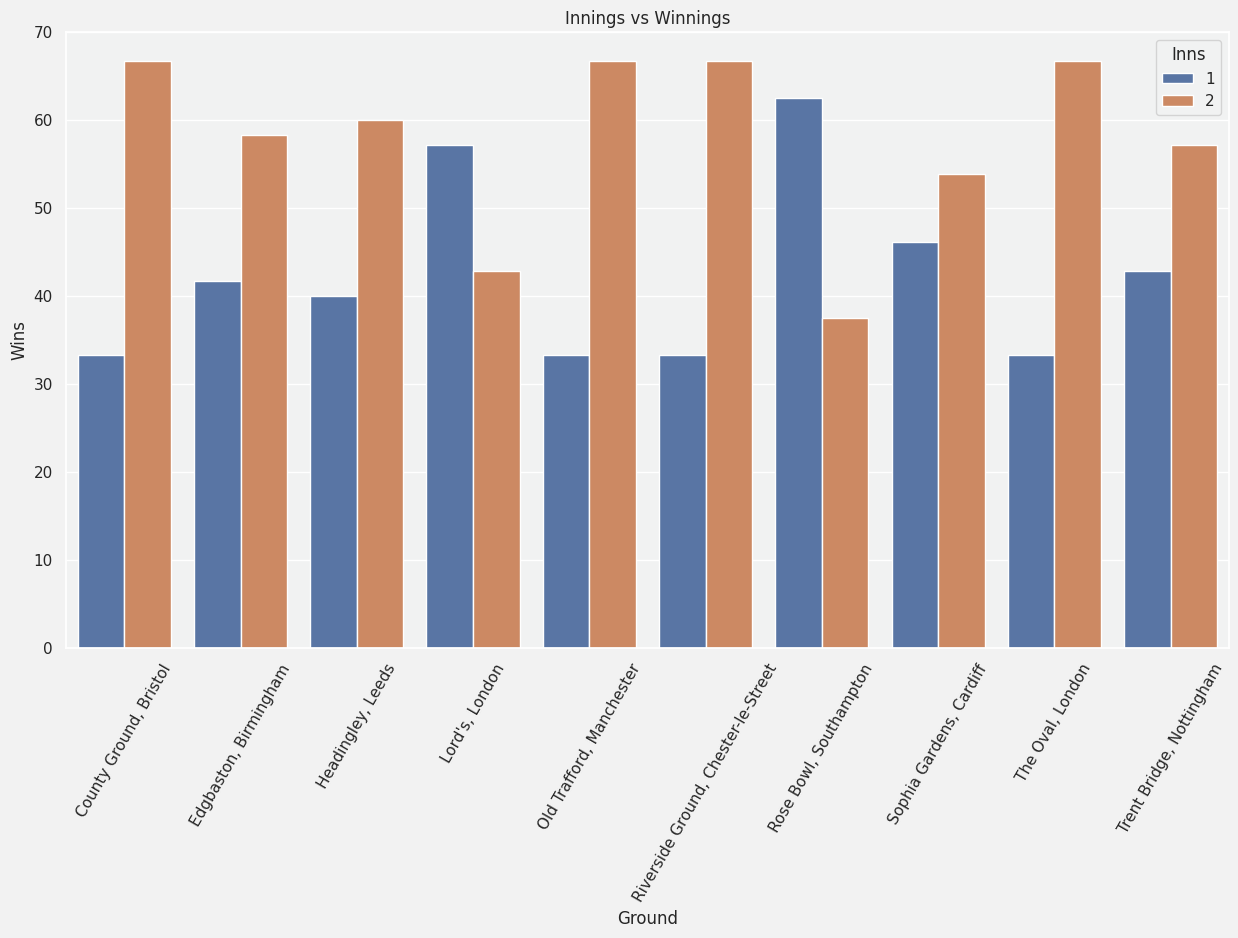

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

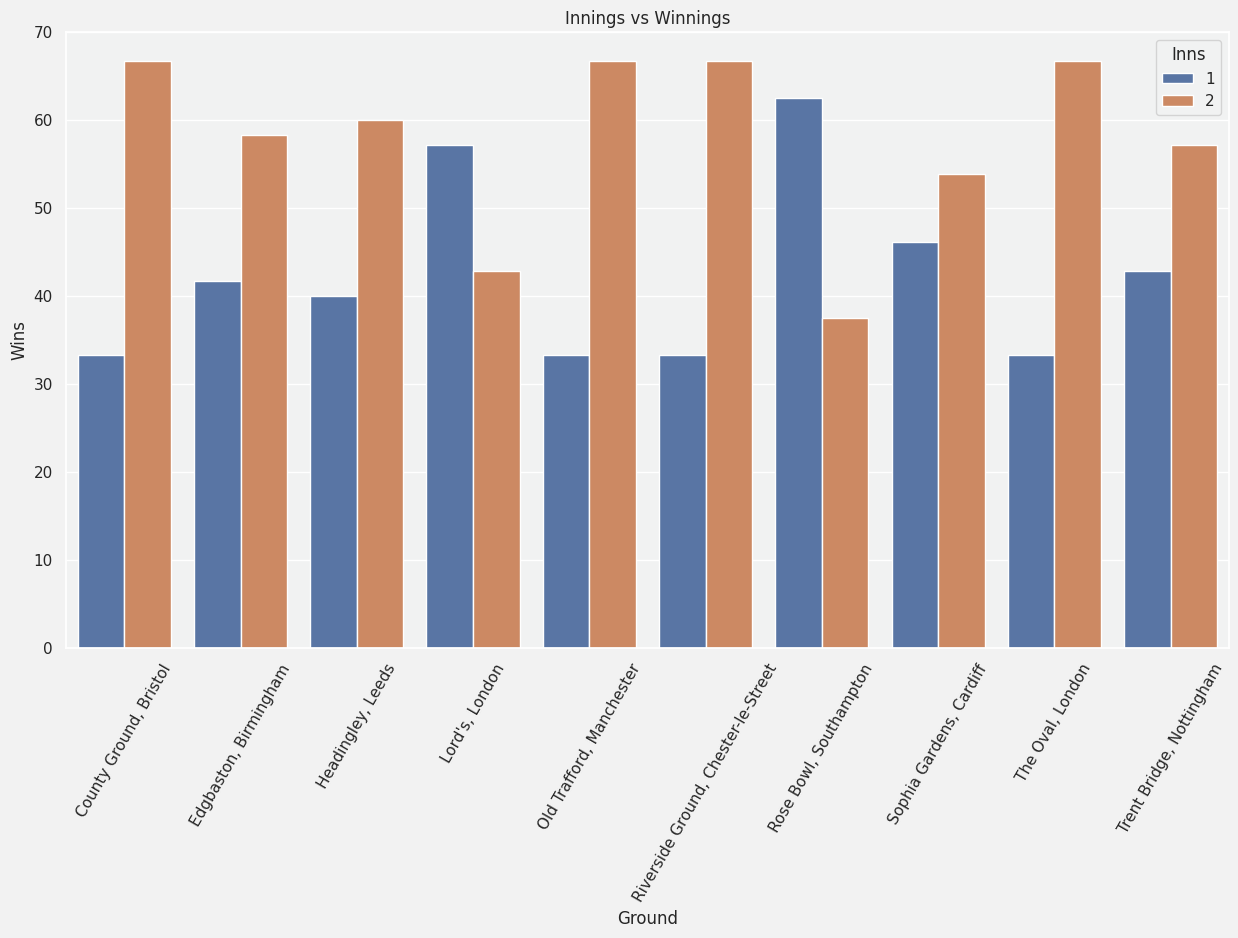

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

We can see that teams that bat second win most of the time.

#### > Score Analysis

1. If a Team bats first, how much should it score to win more times on average ?
2. If a Team bowls first, how much should the Bowling Team restrict the Runs ?

In [ ]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

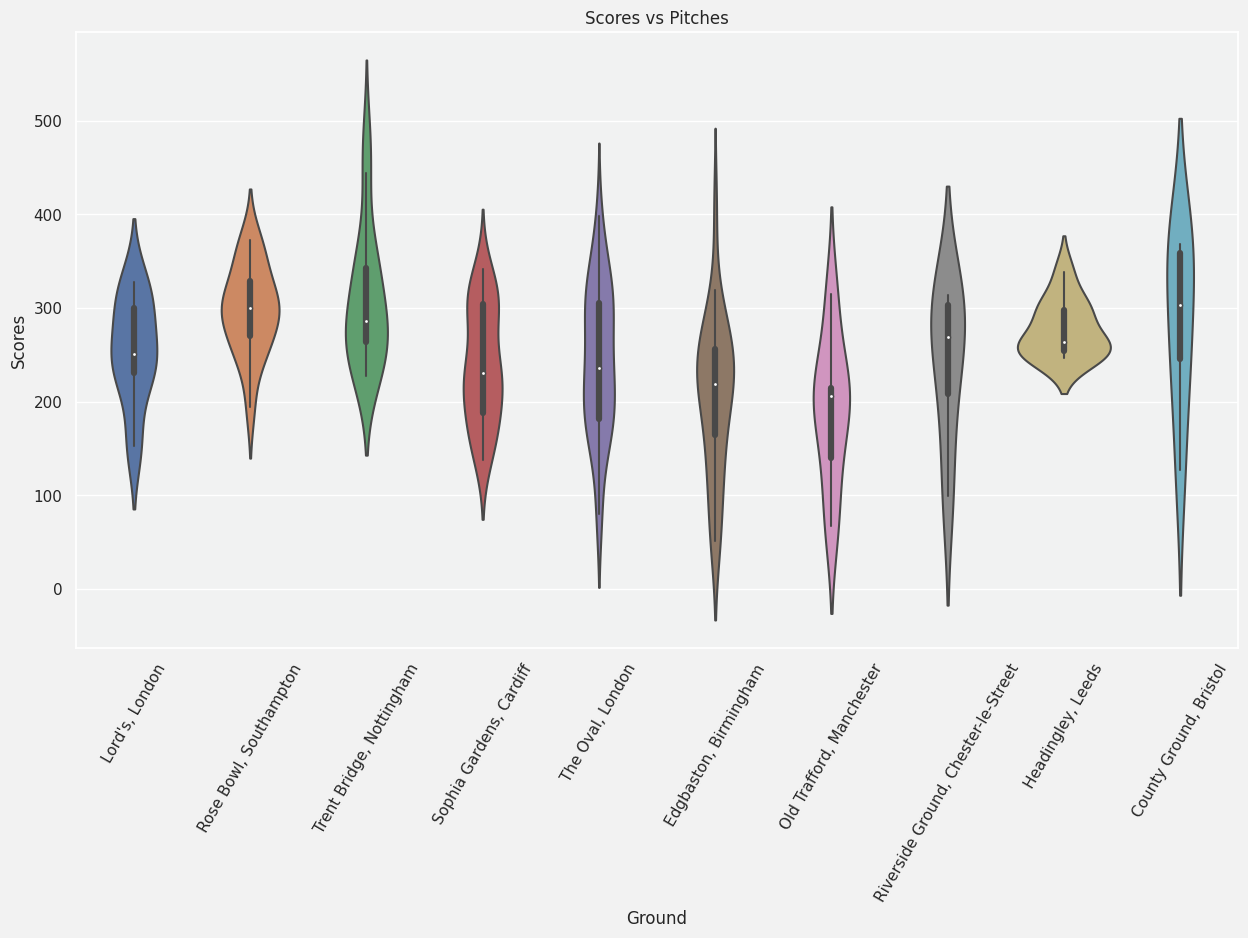

In [ ]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(15,8))
# sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.violinplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

We can see that **Trent Bridge, County Ground** and **Headingley** are good scoring pitches.

Text(0, 0.5, 'Scores')

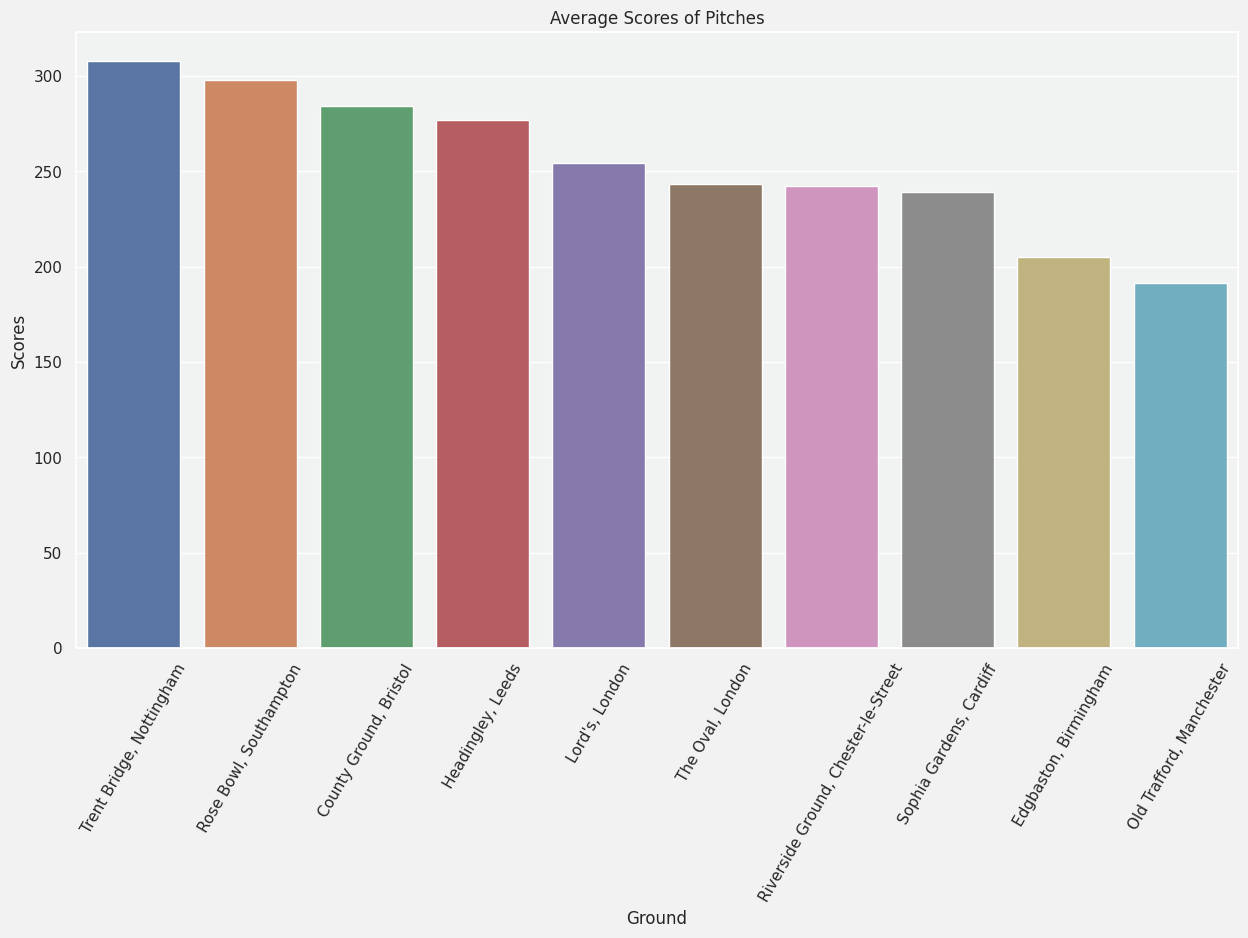

In [ ]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
Stadium_Scores = Stadium_Scores.sort_values(by=["Score_without_wickets"], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

We observe that Trent Bridge has an average of around 300. It shows that teams that play here benefit much by scoring runs. If the team takes quick wickets and wins by a huge margin, then the run rate will increase.

#### > Analyzing the No. of Wickets in these Pitches.

In [ ]:
def no_of_wickets(value):
    # Function to extract wickets from the score
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sophia Gardens, Cardiff'),
  Text(1, 0, "Lord's, London"),
  Text(2, 0, 'Riverside Ground, Chester-le-Street'),
  Text(3, 0, 'Old Trafford, Manchester'),
  Text(4, 0, 'Headingley, Leeds'),
  Text(5, 0, 'Trent Bridge, Nottingham'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'County Ground, Bristol'),
  Text(8, 0, 'Edgbaston, Birmingham'),
  Text(9, 0, 'The Oval, London')])

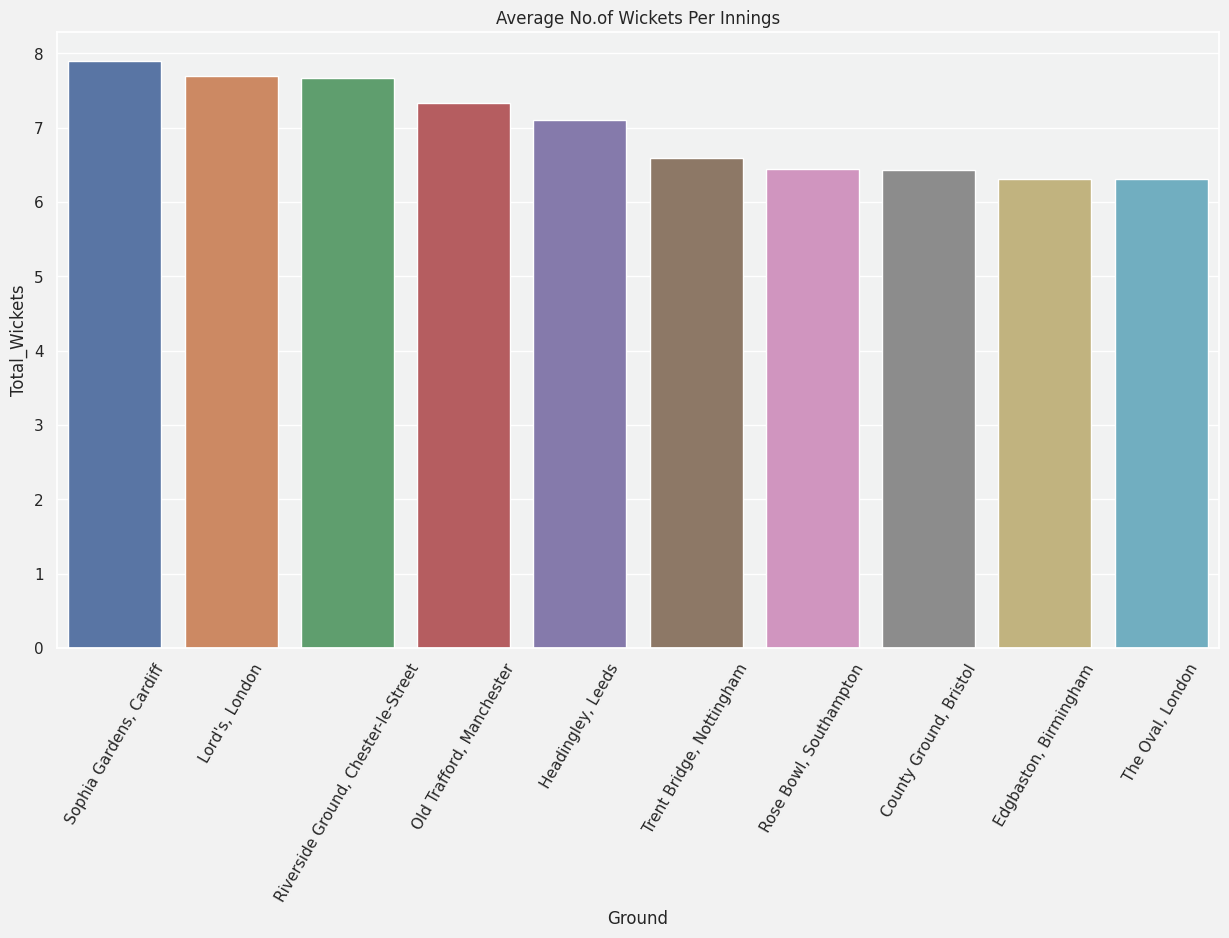

In [ ]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()
Stadium_Wickets = Stadium_Wickets.sort_values(by=["Total_Wickets"], ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

We observe that the minimum no. of Wickets for any innings is usually 6 - 7

In [ ]:
# Creating a dictionary consisting of each team data wrt every Stadium

Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = dict()

for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})

# Example:
Ground_Winnings["Lord's, London"]

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

This data represents team-wise wins in respective Stadiums. Lets plot the data to understand the results.

In [ ]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():

    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [ ]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

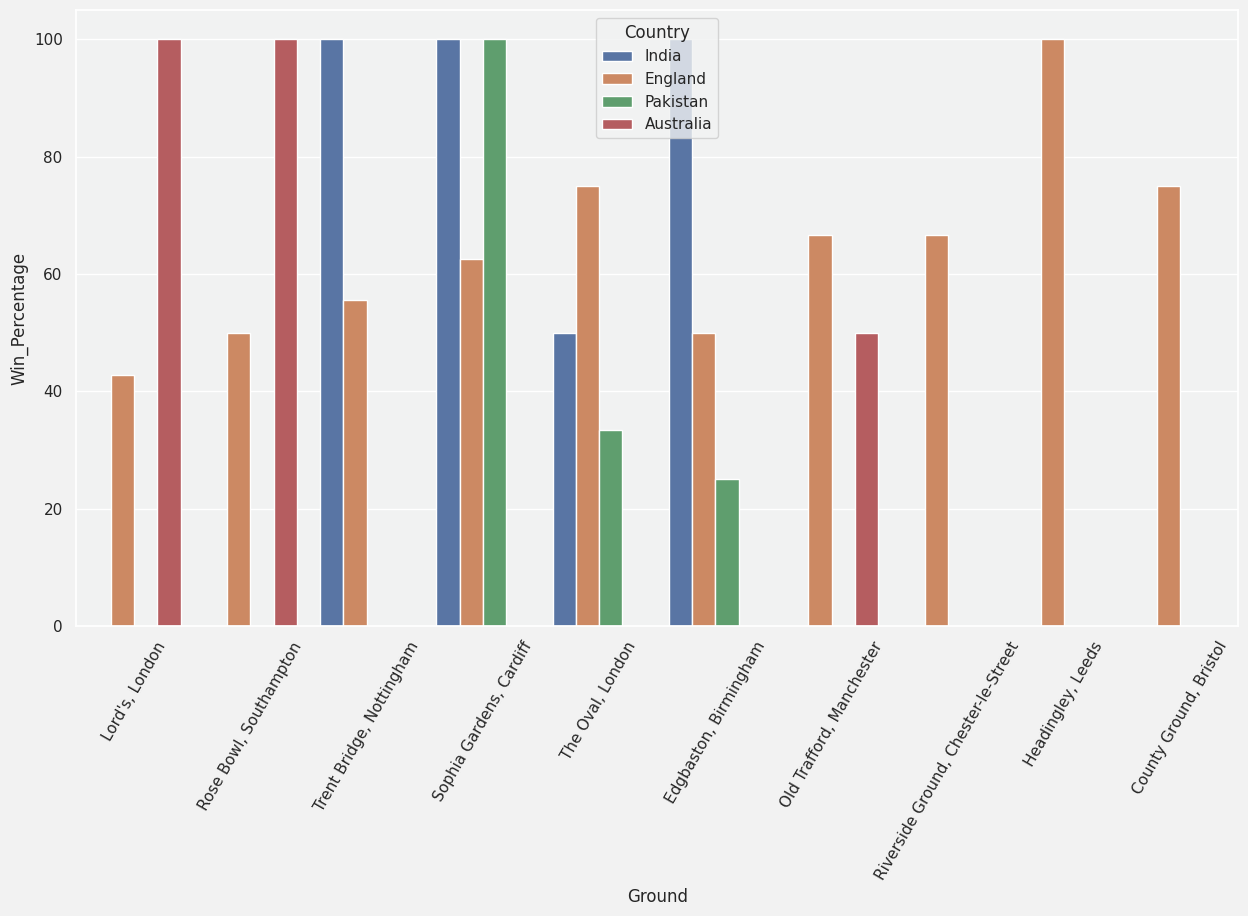

In [ ]:
Pitch_Team_Winnings
plt.figure(figsize=(15,8))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

We observe that:
- Some countries have a Winning percentage of 0% in some stadiums, probably because they haven't played there before.
- England, Pakistan and India have a winning percentage of 100 in a few stadiums.

### > Finding the Best Batsman

We answer a few questions such as:
- Batsmen with average above 40
- Batsmen with Best Strike Rate
- Batsmen with Highest No. of Fours, Sixers

In [ ]:
batsman.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
8162,8163,1,1,1,100.00,0,0,v Zimbabwe,Dhaka,11 Nov 2015,ODI # 3706,Mustafizur Rahman,330902
1835,1836,DNB,-,-,-,-,-,v South Africa,Pallekele,28 Jul 2013,ODI # 3400,Angelo Mathews,49764
9163,9164,16,16,20,80.00,3,0,v Ireland,Dhaka,25 Feb 2011,ODI # 3108,Shakib Al Hasan,56143
4621,4622,DNB,-,-,-,-,-,v India,Wellington,31 Jan 2014,ODI # 3467,Matt Henry,506612
2248,2249,DNB,-,-,-,-,-,v Sri Lanka,Centurion,22 Sep 2009,ODI # 2893,Dale Steyn,47492


In [ ]:
# Removing DNB, and Fetching the Details of Batsmen stats only in England

batsman.drop(columns=batsman.columns[0],inplace=True)
batsman = batsman[~batsman.Bat1.isin(["DNB","TDNB"])]
batsman = batsman[batsman.Player_ID.isin(wc_players.ID)]
stadiums = [item[0] for item in set(WC_ground_stats)]
Batsman_Data_in_England = batsman[batsman.Ground.isin(stadiums)]

In [ ]:
#Calculating Averages

def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1

Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

In [ ]:
change_type = ["Runs","BF","4s","6s"]

for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

In [ ]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [ ]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [ ]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
29,Glenn Maxwell,359,319,35,11,3250260,9,39.888889
22,Dimuth Karunaratne,4,7,1,0,227772,1,4.000000
98,Tim Southee,76,82,9,1,2556004,7,10.857143
96,Tamim Iqbal,355,400,35,7,393358,7,50.714286
43,Jhye Richardson,21,34,0,0,2322669,2,10.500000


In [ ]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]
Best_Batsman_Average = Best_Batsman_Average.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [ ]:
Player_WC_ID = batsman[["Player_ID","Batsman"]].drop_duplicates()

In [ ]:
# Best Batsman with Average above 40

Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
wc_players.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(wc_players,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [ ]:
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


The top 5 batsmen based on Average:
1. Imam-ul-Haq
2. Evin Lewis
3. Jason Holder
4. Ravindra Jadeja
5. Sarfaraz Ahmed

Average is good for the above since they have played very few matches and performed well in those matches.

In [ ]:
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


The top 5 batsmen based on Strike Rate:
1. Evin Lewis
2. Jason Holder
3. Jos Buttler
4. Fakhar Zaman
5. Imad Wasim

**Evin Lewis** and **Jason Holder** have good rankings based on these metrics.

The above players were the best players in the 2019 World Cup.

In [ ]:
Best_Batsman_Average["Average_4s_per_wicket"] = Best_Batsman_Average["4s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average["Average_6s_per_wicket"] = Best_Batsman_Average["6s"]/Best_Batsman_Average["Out_or_NotOut"]

In [ ]:
Best_Batsman_Average.sort_values(by = ["Average_4s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384,12.000000,0.500000
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India,101.035197,7.866667,0.866667
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691,7.545455,1.045455
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729,7.250000,1.250000


The top 5 batsmen with most 4s per innings

1. Imam-ul-Haq
2. Evin Lewis
3. Shikhar Dhawan
4. Jonny Bairstow
5. Ravindra Jadeja

In [ ]:
Best_Batsman_Average.sort_values(by = ["Average_6s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.00000,4.50000
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835,5.00000,3.50000
18,David Miller,289,294,15,12,321777,6,48.166667,SouthAfrica,98.299320,2.50000,2.00000
47,Jos Buttler,1654,1358,147,47,308967,32,51.687500,England,121.796760,4.59375,1.46875
91,Shaun Marsh,372,374,28,11,6683,8,46.500000,Australia,99.465241,3.50000,1.37500


The top 5 batsmen with most 6s per innings

1. Evin Lewis
2. Jason Holder
3. David Miller
4. Jos Buttler
5. Shaun Marsh

#### > Which countries have the best Batsmen ?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'India'),
  Text(3, 0, 'WestIndies'),
  Text(4, 0, 'NewZealand'),
  Text(5, 0, 'SouthAfrica'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'Australia')])

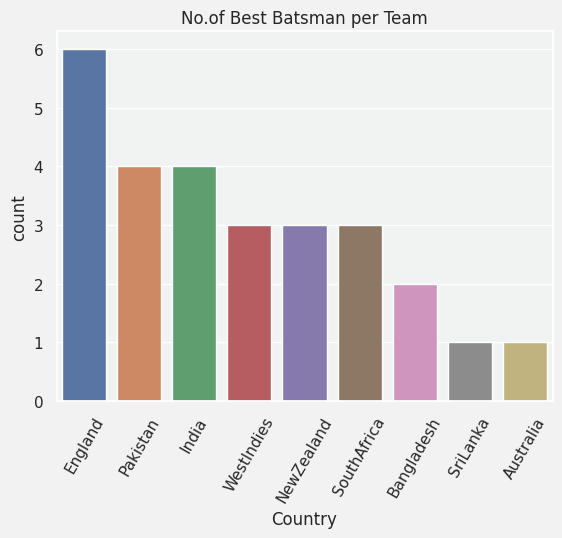

In [ ]:
sns.countplot(data=Best_Batsman_Average,
              x="Country",
              order=Best_Batsman_Average["Country"].value_counts().index).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

**England**, **Pakistan**, and **India** have the best batsmen.

What are their names ?

In [ ]:
Best_Batsman_Average[["Country","Batsman"]].sort_values("Country")

,Country,Batsman
91,Australia,Shaun Marsh
62,Bangladesh,Mahmudullah
96,Bangladesh,Tamim Iqbal
47,England,Jos Buttler
46,England,Jonny Bairstow
45,England,Joe Root
24,England,Eoin Morgan
10,England,Ben Stokes
40,England,Jason Roy
92,India,Shikhar Dhawan


### > Analyzing Bowlers

In [ ]:
bowler.head(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [ ]:
bowler = bowler[bowler.Ground.isin(stadiums)]
bowler = bowler[~bowler.Overs.str.contains('-')]
bowler.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
7092,7093,6.0,0,35,2,5.83,17.50,18.0,v New Zealand,Southampton,14 Jun 2015,ODI # 3656,Ben Stokes,311158
7728,7729,10.0,0,39,2,3.90,19.50,30.0,v Pakistan,Leeds,1 Sep 2016,ODI # 3775,Moeen Ali,8917
7522,7523,4.0,0,27,1,6.75,27.00,24.0,v Pakistan,The Oval,8 May 2019,ODI # 4130,Liam Plunkett,19264
45,46,2.0,0,8,1,4.00,8.00,12.0,v England,Bristol,26 Jun 2016,ODI # 3755,Suranga Lakmal,49619
2580,2581,2.0,0,7,0,3.50,-,-,v Sri Lanka,The Oval,3 Jun 2017,ODI # 3877,JP Duminy,44932


Important variables:

1. `Econ`: Economy of a Bowler, means how many runs the Bowler concedes in one Over.
2. `Ave`: Average for a Bowler, means how many runs conceded by Bowler per wicket.
3. `SR`: Strike Rate refers to the no. of balls bowled for gaining the wicket.
4. `Mdns`: Maiden Over means that the Bowler did not concede any run.

In [ ]:
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [ ]:
bowler["Balls"] = bowler.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    bowler[i] = bowler[i].astype('float')
bowler.Ground = bowler.Ground.apply(full_ground_names)
Bowlers_Data_in_England = bowler.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

In [ ]:
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
18,Faf du Plessis,8.0,0.0,1.0,12.0,4.000000,8.000000,12.000000
68,Shadab Khan,172.0,0.0,4.0,186.0,5.548387,43.000000,46.500000
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


Since we are concentrating mainly on Best Bowlers and Full time Bowlers, Let's remove the Bowlers Data Who have bowled a total of less than 10 overs in England Pitches and taken at least one wicket.

In [ ]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
...,...,...,...,...,...,...,...,...
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


In [ ]:
Player_WC_ID = bowler[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(wc_players,how = "left",on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,India


#### > Highest No. of Maiden Overs

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica


If we observe **Bhuvneshwar Kumar**, his Maiden Overs are less, but he bowled few overs compared to the rest. So we should consider no. of maidens per total Overs. Then, it's the correct way to judge.

In [ ]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
28,Kane Williamson,256.0,0.0,6.0,246.0,6.243902,42.666667,41.000000,277906,NewZealand,0.000000
17,Imad Wasim,465.0,1.0,9.0,538.0,5.185874,51.666667,59.777778,227758,Pakistan,1.115242
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
54,Shakib Al Hasan,318.0,0.0,4.0,342.0,5.578947,79.500000,85.500000,56143,Bangladesh,0.000000


In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,Bangladesh,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,Pakistan,5.594406


#### > Top 10 Best Bowlers based on Average

In [ ]:
Bowlers_Data_in_England.sort_values(by=["Average"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,Australia,0.000000


#### > Top 10 Bowlers based on Economy

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,Australia,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,Pakistan,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,India,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,Pakistan,0.843882
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,WestIndies,25.000000
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,Australia,7.692308


#### > Top 10 Best Bowlers based on Strike Rate

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,India,0.000000
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,India,3.076923
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,Bangladesh,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,England,3.333333
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,Australia,3.846154
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,NewZealand,2.272727
42,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000,1158100,Pakistan,0.000000


#### > Top 10 Highest Wicket Takers

In [ ]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,England,1.866833
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,England,0.504626
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,England,4.441155
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,India,3.521127
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,NewZealand,7.884363


**England** played many games, thats why they are leading in taking wickets.

#### > Which countries have the best Bowlers ?

In [ ]:
aggregations = {
    'Runs':'sum',
    'Mdns':'sum',
    'Wkts':'sum',
    'Balls':'sum',
    'Economy': 'mean',
    'Average':'mean',
    'Strike_Rate':'mean',
    'Maidens_per_Overs_Percentage':'mean'
}

Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

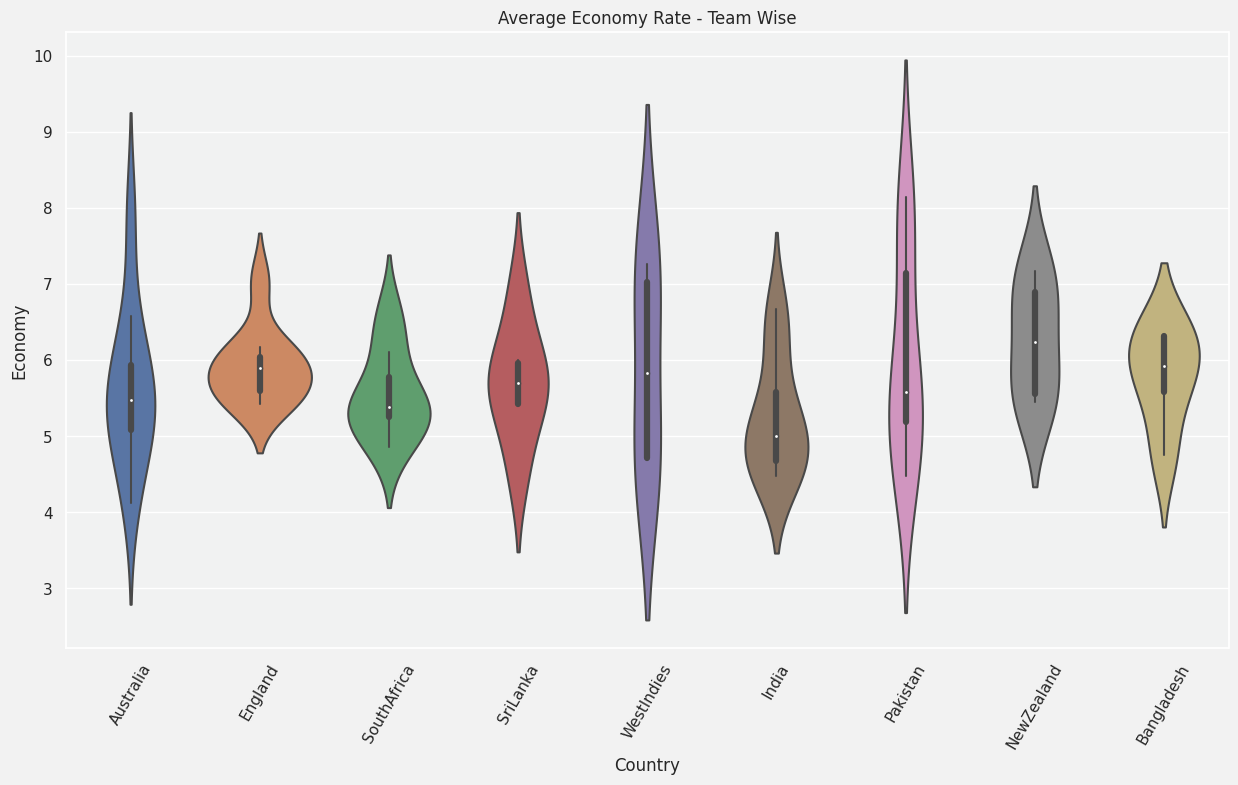

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

We observe that:
1. Batsmen can target High Economy Rate Teams e.g Bangladesh, New Zealand, West Indies.
2. India, S. Africa and Australia have good Economy Rates.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

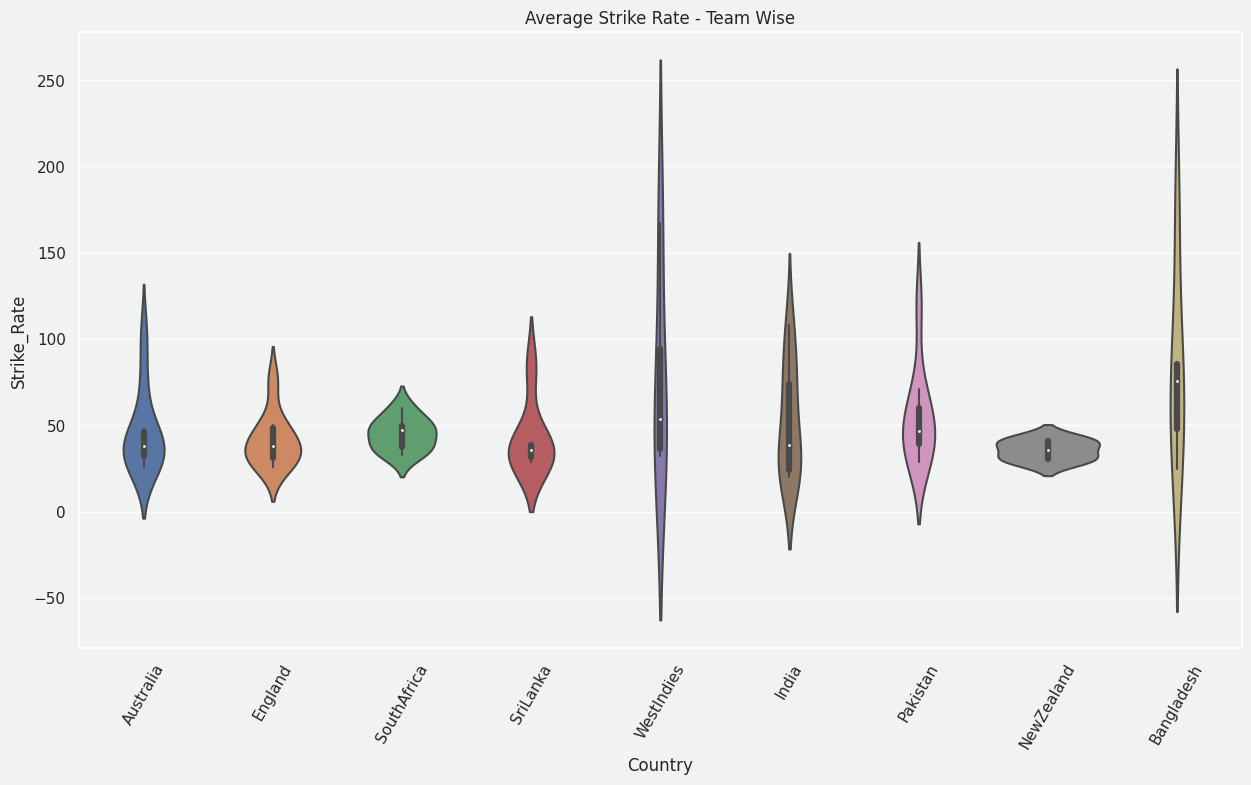

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Strike_Rate", data = Bowlers_Data_in_England).set_title("Average Strike Rate - Team Wise")
plt.xticks(rotation = 60)

On Average, it seems like all nations take around 40-60 Balls for taking a Wicket.
1. New Zealand has good Strike Rate consistency. But in the previous graph we can observe that, they are giving more runs.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

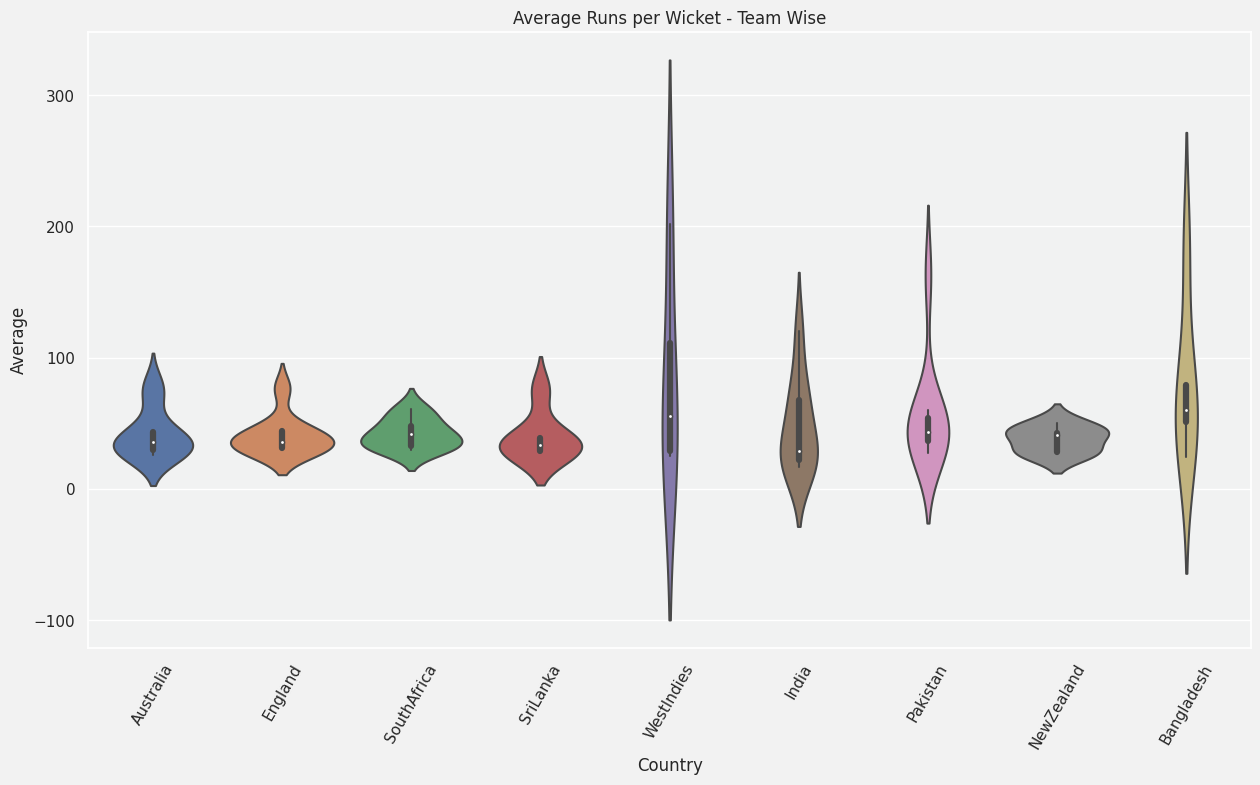

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = "Country", y = "Average", data = Bowlers_Data_in_England).set_title("Average Runs per Wicket - Team Wise")
plt.xticks(rotation = 60)

We observe that:

1. Teams are targeting Bangladesh.
2. No consistency in West Indies, India, Pakistan.
3. Even New Zealand is giving more runs per wicket.
4. Australia, England, South Africa are consistent in giving runs per wicket.
5. On an Average, India has less Average Rate.

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

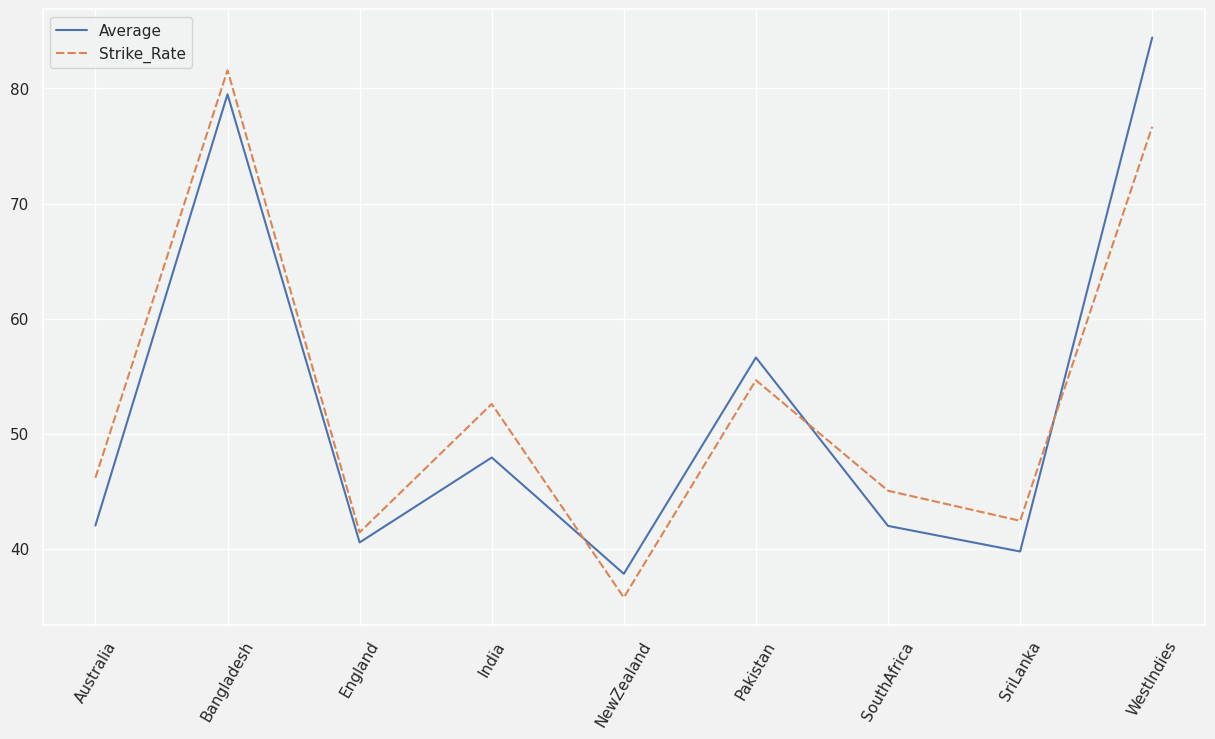

In [ ]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[Bowlers_Data_in_England_TeamWise.columns[6:8]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

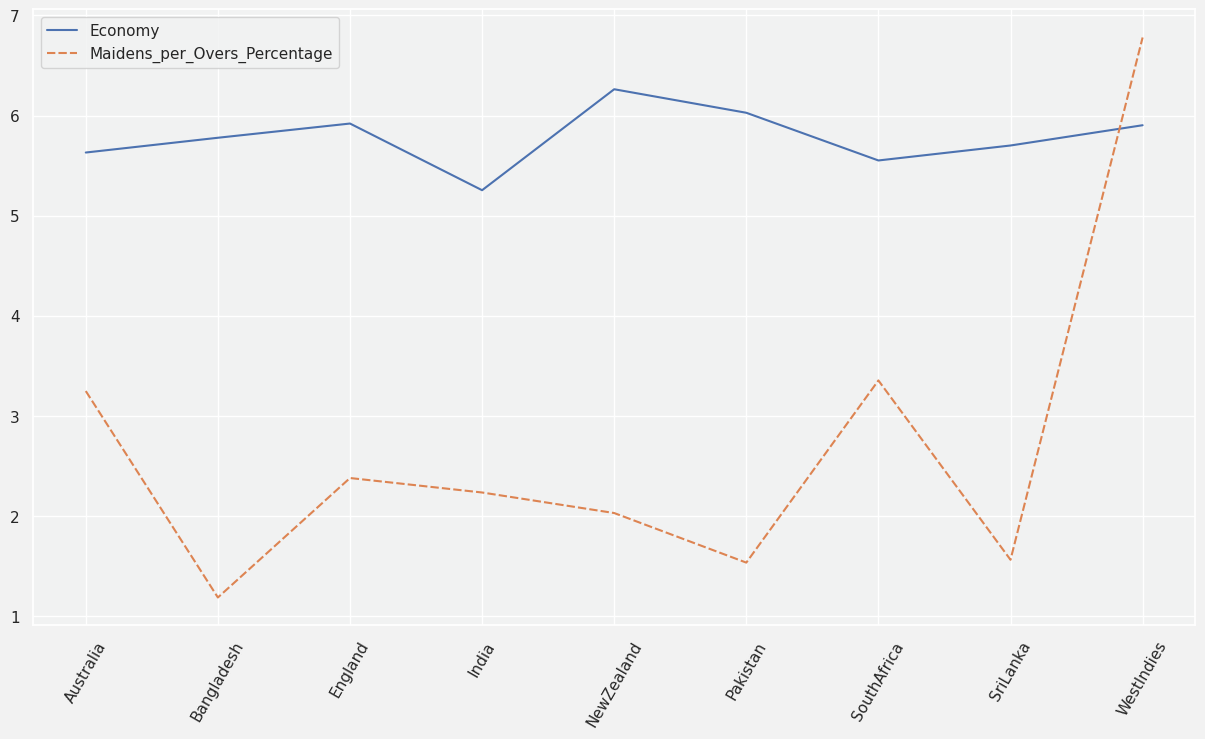

In [ ]:
plt.figure(figsize=(15,8))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[["Economy","Maidens_per_Overs_Percentage"]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

Insights:

1. When Playing against India, it's difficult to score high runs, even thoug India may not take wickets but they will restrict opponents to a less score.
2. South Africa seems to be the Best Team in terms of Bowling.
3. Teams can score more while playing against Bangladesh and West Indies.

Now let's see which Country has the best bowlers in their team. The criteria for selecting the best bowlers are:

1. Minimum No. of Overs Bowled: 25
2. Average Less than 40
3. Strike Rate Less than 40
4. Economy Rate Less than 7.5

In [ ]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)

                       ]
Best_Bowlers_Data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,SriLanka,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'SriLanka'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'SouthAfrica'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'NewZealand'),
  Text(7, 0, 'WestIndies')])

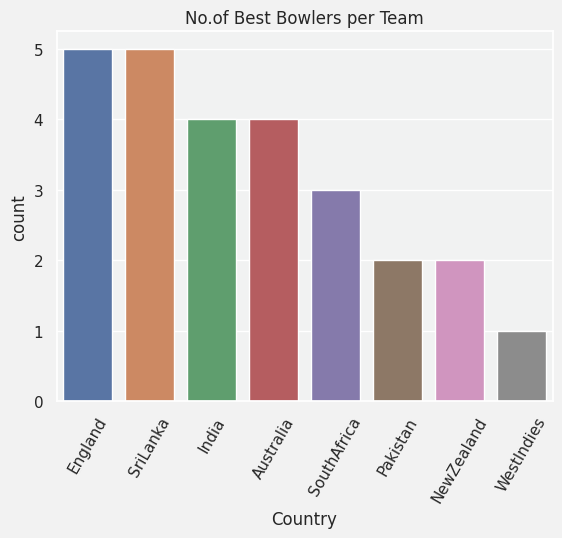

In [ ]:
sns.countplot(
    data=Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)],
    x="Country",
    order=Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)].Country.value_counts().index
).\
set_title("No.of Best Bowlers per Team")
plt.xticks(rotation = 60)

Insights:
1. England seems to be the best team in both Batting and Bowling.
2. India seems to be tough competition for England.

#### > Best All Rounders

In [ ]:
bowler = bowler[bowler.columns[1:]]
bowler.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition',\
                       'Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
bowler.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
3403,10.0,0.0,62.0,2.0,6.20,31.00,30.0,v England,"Trent Bridge, Nottingham",17 May 2019,ODI # 4138,Imad Wasim,227758,60.0
2499,4.0,0.0,11.0,1.0,2.75,11.00,24.0,v England,"Trent Bridge, Nottingham",5 Sep 2012,ODI # 3304,JP Duminy,44932,24.0
7428,10.0,0.0,49.0,3.0,4.90,16.33,20.0,v India,"Headingley, Leeds",17 Jul 2018,ODI # 4018,Adil Rashid,244497,60.0
3384,0.3,0.0,3.0,0.0,6.00,-,-,v India,"The Oval, London",18 Jun 2017,ODI # 3894,Imad Wasim,227758,3.0
7402,10.0,0.0,47.0,2.0,4.70,23.50,30.0,v New Zealand,"Sophia Gardens, Cardiff",6 Jun 2017,ODI # 3880,Adil Rashid,244497,60.0


In [ ]:
Batsman_Data_Information.sample(5)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Out_or_NotOut
6736,9,9,9,100.00,0,0,v England,Southampton,6 Sep 2011,ODI # 3187,Virat Kohli,253802,1
7096,23,23,29,79.31,3,0,v India,Cardiff,27 Aug 2014,ODI # 3517,Ben Stokes,311158,1
7687,12,12,20,60.00,1,0,v Australia,Manchester,24 Jun 2018,ODI # 4013,Jonny Bairstow,297433,1
7638,31,31,30,103.33,5,0,v Pakistan,Nottingham,17 May 2019,ODI # 4138,Tom Curran,550235,1
8808,14,14,34,41.17,2,0,v New Zealand,Cardiff,9 Jun 2017,ODI # 3883,Mushfiqur Rahim,56029,1


In [ ]:
Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(full_ground_names)
Batsman_Data_Information = Batsman_Data_Information[["Runs","BF","SR","4s","6s","Match_ID",\
                                                     "Player_ID","Out_or_NotOut"]]
Batsman_Data_Information.columns = ["Runs_Scored","Balls_Faced","Batting_StrikeRate","4s","6s",\
                                    "Match_ID","Player_ID","Out_or_NotOut"]

Batsman_Data_Information.sample(5)

,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Match_ID,Player_ID,Out_or_NotOut
3627,33,43,76.74,2,0,ODI # 3878,41434,1
4423,21,16,131.25,3,0,ODI # 3656,502714,1
1652,7,31,22.58,1,0,ODI # 3376,301236,1
9632,44,37,118.91,4,1,ODI # 4011,325012,1
3290,15,15,100.00,1,1,ODI # 3888,681117,1


In [ ]:
All_Rounders_Data = bowler.merge(Batsman_Data_Information,on = ["Match_ID","Player_ID"])
All_Rounders_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Out_or_NotOut
140,10.0,2.0,26.0,3.0,2.60,8.66,20.0,v England,"Old Trafford, Manchester",17 Jun 2003,ODI # 2025,Shoaib Malik,42657,60.0,24,26,92.30,3,0,1
331,10.0,0.0,68.0,1.0,6.80,68.00,60.0,v Ireland,"Lord's, London",7 May 2017,ODI # 3865,Adil Rashid,244497,60.0,39,25,156.00,5,0,1
225,5.0,1.0,25.0,1.0,5.00,25.00,30.0,v Australia,"Old Trafford, Manchester",13 Sep 2015,ODI # 3684,Mark Wood,351588,30.0,13,13,100.00,2,0,1
153,2.0,0.0,10.0,0.0,5.00,-,-,v India,"Edgbaston, Birmingham",4 Jun 2017,ODI # 3878,Shoaib Malik,42657,12.0,15,9,166.66,2,1,1
131,10.0,0.0,38.0,1.0,3.80,38.00,60.0,v South Africa,"Edgbaston, Birmingham",10 Jun 2013,ODI # 3367,Mohammad Hafeez,41434,60.0,7,21,33.33,0,0,1


Now we have the Data of players who bowled and batted in the same match. Ideally, an all-rounder should possess the following characteristics:
1. Should have good batting average and bowling average.
2. Should have good Economy while Bowling and good Strike Rate while Batting.

In [ ]:
All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut
59,481896,Mohammed Shami,0.0,52.0,2.0,60.0,0,2,0,0,1
74,774223,Jhye Richardson,1.0,214.0,5.0,162.0,21,34,0,0,2
43,315594,Ashley Nurse,0.0,163.0,1.0,149.0,33,25,3,2,2
52,373538,Sabbir Rahman,0.0,24.0,1.0,13.0,43,36,7,0,2
18,219889,David Warner,0.0,8.0,0.0,6.0,2,19,0,0,1


In [ ]:
#Bowling Stats
All_Rounders_Data["Economy"] = All_Rounders_Data.Runs_Given*6/All_Rounders_Data.Balls_Bowled
All_Rounders_Data["Bowling_StrikeRate"] = All_Rounders_Data.Runs_Given/All_Rounders_Data.Wickets
All_Rounders_Data["Bowling_Average"] = All_Rounders_Data.Balls_Bowled/All_Rounders_Data.Wickets
#Batting Stats
All_Rounders_Data["Batting_Average"] = All_Rounders_Data.Runs_Scored/All_Rounders_Data.Out_or_NotOut
All_Rounders_Data["Batting_StrikeRate"] = All_Rounders_Data.Runs_Scored*100/All_Rounders_Data.Balls_Faced
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
32,272262,Kane Richardson,1.0,156.0,6.0,156.0,15,27,0,1,2,6.000000,26.000000,26.000000,7.500000,55.555556
72,681117,Faheem Ashraf,0.0,181.0,3.0,152.0,31,30,2,1,3,7.144737,60.333333,50.666667,10.333333,103.333333
5,40618,Imran Tahir,0.0,105.0,1.0,90.0,1,7,0,0,1,7.000000,105.000000,90.000000,1.000000,14.285714
24,233514,Thisara Perera,0.0,97.0,1.0,114.0,18,44,2,0,4,5.105263,97.000000,114.000000,4.500000,40.909091
44,318788,Haris Sohail,0.0,35.0,0.0,30.0,55,59,7,0,2,7.000000,inf,inf,27.500000,93.220339


In [ ]:
All_Rounders_Data[(All_Rounders_Data.Balls_Bowled > 120)&\
                 (All_Rounders_Data.Economy < 7)&\
                 (All_Rounders_Data.Batting_StrikeRate > 70)&\
                 (All_Rounders_Data.Batting_Average > 35)]

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258
20,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729
35,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869
39,303669,Joe Root,0.0,664.0,9.0,654.0,1026,1194,90,3,27,6.091743,73.777778,72.666667,38.000000,85.929648
41,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213
54,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392


REFERENCES:
- [ICC Cricket World Cup 2019 Analysis - Kaggle](https://www.kaggle.com/code/venky73/icc-cricket-world-cup-2019-analysis)